In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Add the directory containing diffusive_nested_sampling to sys.path
sys.path.append(os.path.abspath( "../.."))
import spike_and_slab

In [3]:
# Likelihood function
def likelihood(x):
    '''
    20-D spike and slab likelihood function

    @param x : coordinate
    @return L : likelihood
    '''
    u = 0.01
    v = 0.1

    # Spike
    t1 = np.sum(-0.5 * (x / v) ** 2) - x.size * np.log(v * np.sqrt(2 * np.pi))
    
    # Slab
    t2 = np.sum(-0.5 * ((x - 0.031) / u) ** 2) - x.size * np.log(u * np.sqrt(2 * np.pi))
    
    return (np.exp(t1) + (100 * np.exp(t2)))

(-0.05, 0.5)

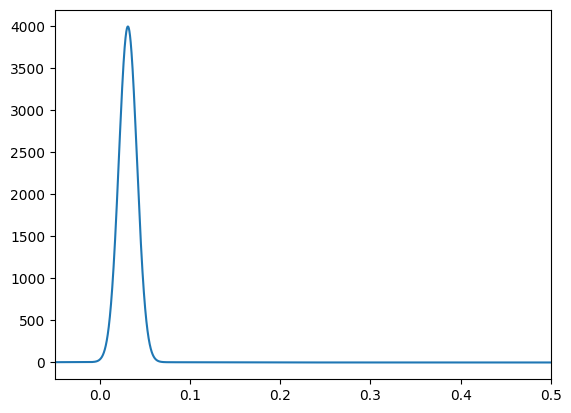

In [4]:
x = np.linspace(-0.05, 0.5, 10000)
y = [likelihood(x_i) for x_i in x]
plt.plot(x, y)
plt.xlim(-0.05, 0.5)

In [5]:
chain, levels, js = spike_and_slab.main()

100%|██████████| 150/150 [17:34<00:00,  7.03s/it]


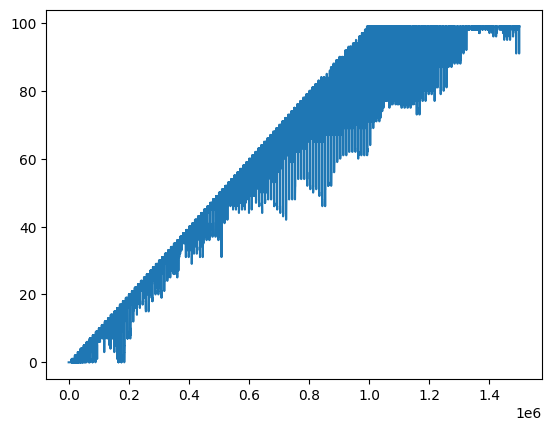

In [6]:
y = js
x = range(len(y))
plt.plot(x, y)
plt.show()

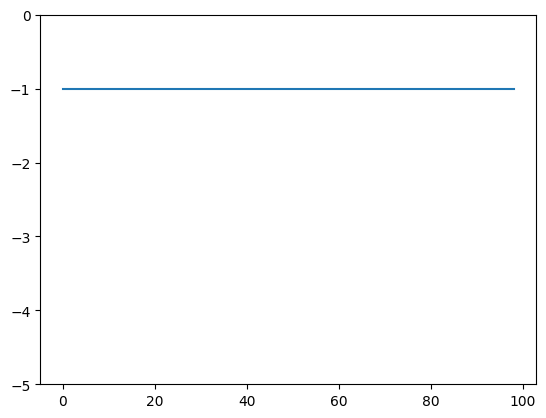

In [7]:
x = range(99)
Xs = np.log([level.get_X for level in levels])
y = Xs[1:] - Xs[:-1]
plt.ylim(-5, 0)
plt.plot(x, y)
plt.show()

In [8]:
print([level.bound for level in levels])
print([level.index for level in levels])
print([level.get_X for level in levels])

[0.0, 5.647188623751551e-298, 2.0538296770735393e-276, 3.7739800795958855e-259, 3.126866198871736e-234, 8.864967544230114e-218, 1.2723845918784774e-202, 2.5769667899870394e-186, 4.179665695323393e-170, 5.0727538518850766e-157, 1.3878844381982435e-141, 5.042549490437829e-130, 8.441128797034797e-120, 4.380767124640648e-111, 6.953847761806294e-102, 1.6929543730378372e-91, 8.119655213207454e-87, 8.648711719130137e-81, 1.103632783072123e-74, 7.713050289942638e-70, 1.8645504947959862e-64, 1.0274412660362283e-57, 4.6238406563003734e-52, 1.2218933705587958e-47, 2.8989928576969774e-43, 2.3289549385188304e-39, 3.2825850332339424e-36, 7.781083672986154e-34, 2.792237848510375e-30, 1.1686289731567013e-27, 9.906866609997847e-25, 2.1289602805369186e-21, 2.7944699113045696e-19, 9.418634870609252e-17, 1.7399855941404192e-15, 7.094168191564203e-14, 2.4364786216050453e-12, 1.4027337886921364e-10, 4.8174908195210864e-09, 8.764471779153051e-07, 9.787285183465203e-06, 0.00013083102936056707, 0.0008858652651